In [143]:
import numpy as np
import pandas as pd

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df=pd.read_csv(r"..\data\bigmart_data.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [147]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [148]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


1. Missing Values: How many products are missing the `Item_Weight` information?

In [149]:
df["Item_Weight"].isnull().sum()

1463

In [150]:
#Let us first try out univariate methods such as mean, median and interpolation to fill the gaps in the Item_Weight field.

df["Item_Weight_mean"]= df["Item_Weight"].fillna(df["Item_Weight"].mean())
df["Item_Weight_median"]= df["Item_Weight"].fillna(df["Item_Weight"].median())
df["Item_Weight_Interpolate"] = df["Item_Weight"].interpolate(method = "linear")
     

#Let us check the differences among the variances
print( "variance of original data:", df["Item_Weight"].var())
print( "variance of mean weight:", df["Item_Weight_mean"].var())
print( "variance of median weight:", df["Item_Weight_median"].var())
print( "variance of interpolation weight:", df["Item_Weight_Interpolate"].var())

variance of original data: 21.561688259836558
variance of mean weight: 17.86012173506058
variance of median weight: 17.869561454073647
variance of interpolation weight: 19.758685821975472


The variances shows that interpolation method is good for missing value imputaion for this field

In [151]:
df["Item_Weight"].fillna(df["Item_Weight"].interpolate(method = "linear"), inplace = True)    

df.drop(["Item_Weight_mean", "Item_Weight_median", "Item_Weight_Interpolate"], inplace= True, axis = 1)

In [152]:
df["Item_Weight"].isnull().sum()

0

In [153]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


2. Fat Content Standardization: There are inconsistencies in the `Item_Fat_Content` labeling. How can you standardize the labels to have consistent naming?

In [154]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [155]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({ 'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [156]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

3. Average Sales: What is the average sales amount for each category of `Item_Fat_Content`?

In [157]:
Sales_Fat_Content=df.groupby("Item_Fat_Content")["Item_Outlet_Sales"].mean().reset_index()
Sales_Fat_Content

,Item_Fat_Content,Item_Outlet_Sales
0,Low Fat,2157.711534
1,Regular,2224.561170


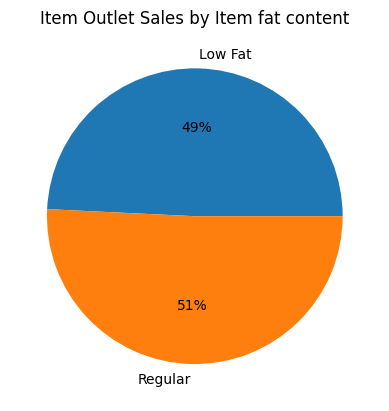

In [158]:
plt.pie(Sales_Fat_Content['Item_Outlet_Sales'], labels = Sales_Fat_Content['Item_Fat_Content'], autopct = "%1.0f%%")
plt.title("Item Outlet Sales by Item fat content")
plt.show()

4. Total Sales per Year: What is the total sales generated by each `Outlet_Establishment_Year`?

In [159]:
df.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].sum()

Outlet_Establishment_Year
1985    3.633620e+06
1987    2.142664e+06
1997    2.118395e+06
1998    1.883402e+05
1999    2.183970e+06
2002    2.036725e+06
2004    2.268123e+06
2007    2.167465e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64

5. Price Range: How many products fall under the high-price range where `Item_MRP` is above the 75th percentile?

In [160]:
df["Item_MRP"].quantile(0.75)

185.6437

In [161]:
df[df["Item_MRP"]>df["Item_MRP"].quantile(0.75)].shape[0]

2131

6. Sales Efficiency: Which outlet has the highest sales efficiency, defined as sales per unit of `Item_Visibility`?

In [162]:
df["Item_Visibility"].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [163]:
sales_efficiency = df.assign(SalesEfficiency=df['Item_Outlet_Sales'] / df['Item_Visibility']).nlargest(1, 'SalesEfficiency')
sales_efficiency

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,SalesEfficiency
3,FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.38,inf


7. Product Popularity: Which product type is the most popular, based on the average sales per product?

In [164]:
df.groupby(["Item_Type"])["Item_Outlet_Sales"].mean().idxmax()

'Starchy Foods'

8. Oldest Outlet Performance: How does the oldest outlet's performance compare to the newest in terms of average sales?

In [165]:
oldest_outlet = df['Outlet_Establishment_Year'].min()
newest_outlet = df['Outlet_Establishment_Year'].max()
oldest_outlet_performance = df[df['Outlet_Establishment_Year'] == oldest_outlet]['Item_Outlet_Sales'].mean()
newest_outlet_performance = df[df['Outlet_Establishment_Year'] == newest_outlet]['Item_Outlet_Sales'].mean()

In [166]:
(newest_outlet,newest_outlet_performance,oldest_outlet,oldest_outlet_performance)

(2009, 1995.498739224138, 1985, 2483.6774743677374)

9. High Visibility Products: Do high visibility items (`Item_Visibility` > 0.05) result in higher sales?

In [167]:
High_Visibility_Products=df[df['Item_Visibility']>0.05]['Item_Outlet_Sales'].count()
High_Visibility_Products

4472

In [168]:
Low_Visibility_Products=df[df['Item_Visibility']<0.05]['Item_Outlet_Sales'].count()
Low_Visibility_Products

4051

In [169]:
df['Item_Outlet_Sales'].count()

8523

10. Low Sales Inquiry: Which items have not achieved minimum expected sales (`Item_Outlet_Sales` < 100)?

In [170]:
df[df['Item_Outlet_Sales'] < 100]['Item_Identifier']

178     DRY23
255     FDQ04
405     FDW24
417     FDW35
430     FDW23
        ...  
8152    FDX23
8239    FDG40
8241    DRH59
8442    FDX40
8486    FDR20
Name: Item_Identifier, Length: 124, dtype: object

11. Seasonal Sales: If you have monthly sales data, can you determine in which month the sales peak for 'Soft Drinks'?

df['Sale_Month'] = pd.to_datetime(df['datetime']).dt.month # Uncomment if you need to create the Sale_Month column
peak_sales_month = df[df['Item_Type'] == 'Soft Drinks'].groupby('Sale_Month')['Item_Outlet_Sales'].mean().idxmax()

12. Healthy vs. Unhealthy: Is there a significant difference in sales between low-fat and regular products?

In [171]:
df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Outlet_Sales, dtype: int64

13. Outlier Detection: Identify the items that have Item_Outlet_Sales far from the average of their respective Item_Type.

In [172]:
mean_sales = df['Item_Outlet_Sales'].mean()
std_sales = df['Item_Outlet_Sales'].std()
outliers = df[(df['Item_Outlet_Sales'] < mean_sales - 3 * std_sales) | (df['Item_Outlet_Sales'] > mean_sales + 3 * std_sales)]

In [173]:
outliers['Item_Identifier']

130     FDY25
145     FDP16
276     FDY55
304     DRE60
333     FDN58
        ...  
7930    FDP15
8039    FDY55
8201    FDO03
8245    FDU55
8447    FDS26
Name: Item_Identifier, Length: 90, dtype: object

14. Stock Turnover: Calculate the stock turnover rate by comparing the number of orders to the quantity of goods sold.

### df['Stock_Turnover'] = df['Orders'] / df['Item_Quantity'] # Uncomment if you have Item_Quantity

15. Location Impact: Analyze the impact of Outlet_Location_Type on Item_Outlet_Sales to determine if certain locations perform better than others.

In [230]:
sales_by_location = df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum().round(2).reset_index()
sales_by_location

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,4482059.07
1,Tier 2,6472313.71
2,Tier 3,7636752.63


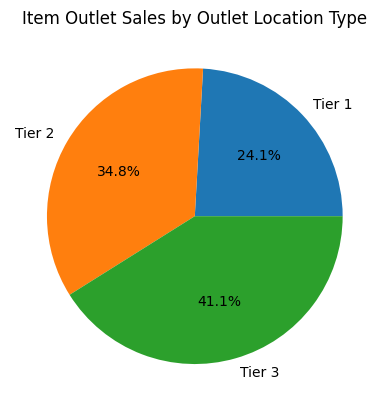

In [229]:
plt.pie(sales_by_location['Item_Outlet_Sales'],labels = sales_by_location['Outlet_Location_Type'],autopct='%1.1f%%')
plt.title("Item Outlet Sales by Outlet Location Type")
plt.show()

16. Discounted Products: How many products have an MRP higher than the average but have sales below the average sales, indicating possible discounts?

In [176]:
avg_mrp=df['Item_MRP'].mean()
avg_sales=df['Item_Outlet_Sales'].mean()
discounted_products = df[(df['Item_MRP'] > avg_mrp) & (df['Item_Outlet_Sales'] < avg_sales)]
discounted_products['Item_Identifier'].count()

1577

17. Weighty Sales: Is there a correlation between the weight of an item and its sales? Find out if heavier items tend to sell more or less.

In [177]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [178]:
df['Item_Weight'].corr(df['Item_Outlet_Sales'])

0.014535651743138837

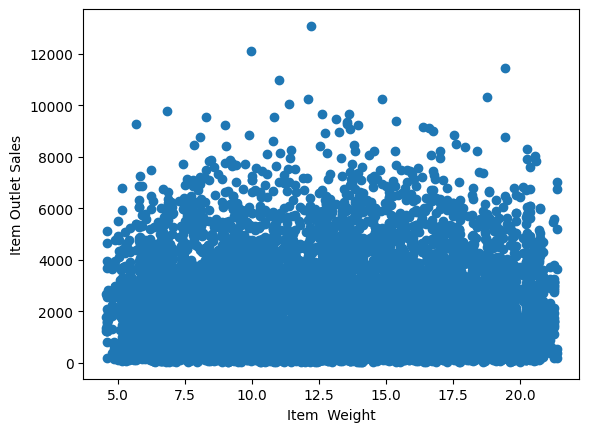

In [179]:
plt.scatter(df['Item_Weight'],df['Item_Outlet_Sales'])
plt.xlabel("Item  Weight")
plt.ylabel("Item Outlet Sales")
plt.show()

18. Fat Content Sales Impact: Do 'Low Fat' products generate more sales than 'Regular' products within the 'Snack Foods' category?

In [180]:
df[df['Item_Type']=='Snack Foods'].groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().round(2).reset_index()

,Item_Fat_Content,Item_Outlet_Sales
0,Low Fat,2411.98
1,Regular,2093.89


19. Revenue by Year: What is the total revenue generated each year? Assume revenue is a direct function of `Item_Outlet_Sales`.

In [181]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().round(2)

Outlet_Establishment_Year
1985    3633620.14
1987    2142663.58
1997    2118395.17
1998     188340.17
1999    2183969.81
2002    2036725.48
2004    2268122.94
2007    2167465.29
2009    1851822.83
Name: Item_Outlet_Sales, dtype: float64

20. Product Variety: Which `Outlet_Identifier` offers the widest variety of `Item_Type`?

In [182]:
df.groupby('Outlet_Identifier')['Item_Type'].nunique()

Outlet_Identifier
OUT010    16
OUT013    16
OUT017    16
OUT018    16
OUT019    16
OUT027    16
OUT035    16
OUT045    16
OUT046    16
OUT049    16
Name: Item_Type, dtype: int64

21. Average Item Visibility: What is the average visibility of items in the 'Household' category compared to the overall average?

In [183]:
df[df['Item_Type'] == 'Household']['Item_Visibility'].mean()

0.061322312856043955

In [184]:
df['Item_Visibility'].mean()

0.06613202877895108

22. Pricing Strategy: What is the standard deviation of the MRP (`Item_MRP`) of 'Dairy' products? Does this suggest a varied pricing strategy?

In [185]:
df[df['Item_Type']=="Dairy"]['Item_MRP'].std()

70.32674350534307

23. Healthy Options: How many unique 'Low Fat' products are there compared to 'Regular' products?

In [186]:
unique_low_fat = df[df['Item_Fat_Content'] == 'Low Fat']['Item_Identifier'].nunique()
unique_regular = df[df['Item_Fat_Content'] == 'Regular']['Item_Identifier'].nunique()

In [187]:
unique_low_fat,unique_regular

(1008, 551)

24. Store Comparison: Compare the mean sales of the smallest and largest `Outlet_Size` stores. Which one performs better?

In [188]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [189]:
mean_sales_small = df[df['Outlet_Size'] == 'Small']['Item_Outlet_Sales'].mean()
mean_sales_large = df[df['Outlet_Size'] == 'High']['Item_Outlet_Sales'].mean()

In [190]:
round(mean_sales_small,2),round(mean_sales_large,2)

(1912.15, 2299.0)

25. Age of Inventory: Calculate the age of the inventory by subtracting the `Outlet_Establishment_Year` from the current year, then find out which age group has the highest average sales.

In [191]:
import datetime as dt

In [192]:
current_year = dt.date.today().year

In [193]:
df['Inventory_Age'] = current_year - df['Outlet_Establishment_Year']
age_group_sales = df.groupby('Inventory_Age')['Item_Outlet_Sales'].mean()

In [194]:
age_group_sales.sort_values(ascending=False)

Inventory_Age
39    2483.677474
20    2438.841866
25    2348.354635
17    2340.675263
37    2298.995256
27    2277.844267
22    2192.384798
15    1995.498739
26     339.351662
Name: Item_Outlet_Sales, dtype: float64

26. Peak Sales Items: Which item had the highest sales in the most recent year in the dataset?

In [195]:
most_recent_year = df['Outlet_Establishment_Year'].max()
peak_sales_item = df[df['Outlet_Establishment_Year'] == most_recent_year]['Item_Outlet_Sales'].idxmax()

In [196]:
peak_sales_item

43

27. Product Replacement: Identify products that have zero visibility but have sales recorded, suggesting a possible error in data recording.

In [197]:
zero_visibility_sales = df[(df['Item_Visibility'] == 0) & (df['Item_Outlet_Sales'] > 0)]
zero_visibility_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Inventory_Age
3,FDX07,19.2000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.9300,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37
5,FDP36,10.3950,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,15
10,FDY07,11.8000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,25
32,FDP33,18.7000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,12.1975,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020,39
8484,DRJ49,6.8650,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736,37
8486,FDR20,20.0000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744,26
8494,NCI54,15.2000,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680,17


In [198]:
df['Item_Visibility'].replace(0,np.nan, inplace=True)

In [199]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Inventory_Age                   0
dtype: int64

In [200]:
#Let us try out univariate methods such as mean, median and interpolation to fill the gaps in the Item_Visibility field.

df["Item_Visibility_mean"]=df["Item_Visibility"].fillna(df["Item_Visibility"].mean())
df["Item_Visibility_median"]= df["Item_Visibility"].fillna(df["Item_Visibility"].median())
df["Item_Visibility_Interpolate"]= df["Item_Visibility"].interpolate(method = "linear")

In [201]:
print( "variance of original data:", df["Item_Visibility"].var())
print( "variance of mean Visibility:", df["Item_Visibility_mean"].var())
print( "variance of median Visibility:", df["Item_Visibility_median"].var())
print( "variance of interpolation Visibility:", df["Item_Visibility_Interpolate"].var())

variance of original data: 0.0025308502760417444
variance of mean Visibility: 0.002374639615962191
variance of median Visibility: 0.002383965020805575
variance of interpolation Visibility: 0.00244957224486514


Comparing all three methods, we can conclude that Interpolation method is the best for missing value imputation in this field. Using the interpolation method to fill the missing values:

In [202]:
df["Item_Visibility"].fillna(df["Item_Visibility"].interpolate(method = "linear"), inplace = True)
df.drop(["Item_Visibility_mean", "Item_Visibility_median", "Item_Visibility_Interpolate"], axis = 1, inplace=True)

In [203]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Inventory_Age                   0
dtype: int64

28. Category Sales Contribution: What percentage of total sales does the 'Fruits and Vegetables' category contribute to?

In [204]:
Sales_Item = df.groupby("Item_Type").agg({"Item_Outlet_Sales": "sum"}).round(2).reset_index()
Sales_Item

,Item_Type,Item_Outlet_Sales
0,Baking Goods,1265525.34
1,Breads,553237.19
2,Breakfast,232298.95
3,Canned,1444151.49
4,Dairy,1522594.05
5,Frozen Foods,1825734.79
6,Fruits and Vegetables,2820059.82
7,Hard Drinks,457793.43
8,Health and Hygiene,1045200.14
9,Household,2055493.71


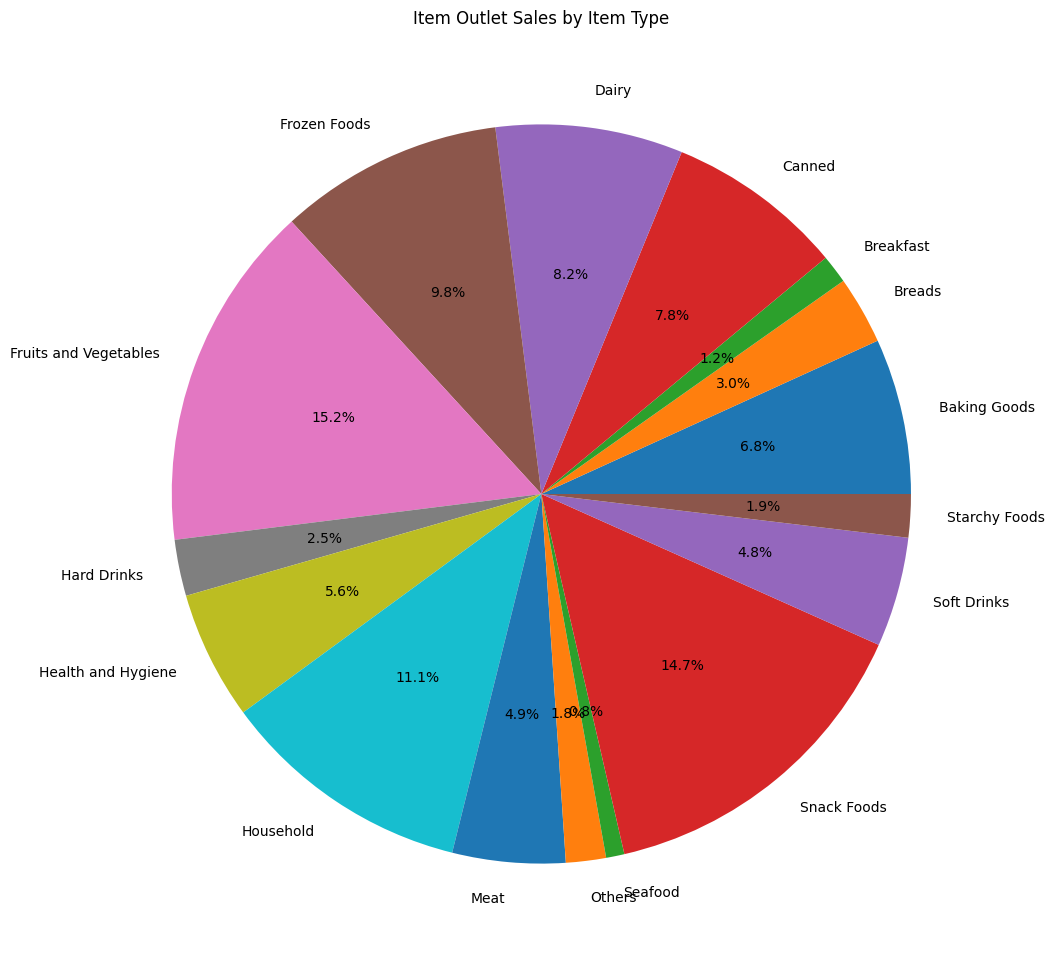

In [205]:
plt.figure(figsize = (12, 12), dpi = 100)
plt.pie(Sales_Item['Item_Outlet_Sales'], labels = Sales_Item['Item_Type'], autopct = "%1.1f%%")
plt.title("Item Outlet Sales by Item Type")
plt.show()

In [206]:
total_sales = df['Item_Outlet_Sales'].sum()
fruits_veggies_sales = df[df['Item_Type'] == 'Fruits and Vegetables']['Item_Outlet_Sales'].sum()

In [207]:
fruits_veggies_percentage = (fruits_veggies_sales / total_sales)*100
round(fruits_veggies_percentage,2)

15.17

29. Sales and Establishment Year: Is there a trend in sales with respect to the `Outlet_Establishment_Year`? Do older outlets have higher sales?

In [208]:
sales_trend_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().reset_index()
sales_trend_by_year

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1985,2483.677474
1,1987,2298.995256
2,1997,2277.844267
3,1998,339.351662
4,1999,2348.354635
5,2002,2192.384798
6,2004,2438.841866
7,2007,2340.675263
8,2009,1995.498739


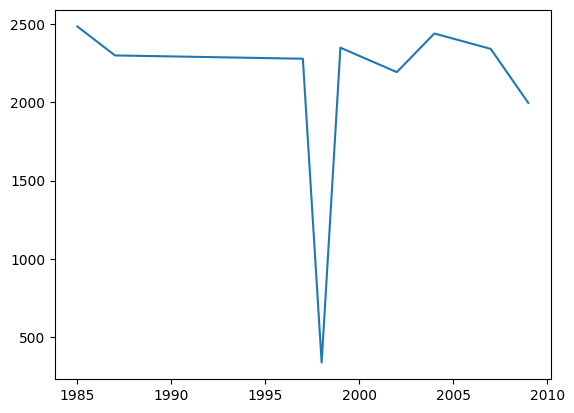

In [209]:
plt.plot(sales_trend_by_year['Outlet_Establishment_Year'],sales_trend_by_year['Item_Outlet_Sales'])
plt.show()

30. Location-Based Sales: Within each `Outlet_Location_Type`, which `Outlet_Type` has the highest average sales, and how does this compare to the average sales of all outlets?

In [210]:
location_based_sales = df.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].agg(['count','mean']).reset_index()
location_based_sales

,Outlet_Location_Type,Outlet_Type,count,mean
0,Tier 1,Grocery Store,528,340.329723
1,Tier 1,Supermarket Type1,1860,2313.099451
2,Tier 2,Supermarket Type1,2785,2323.990559
3,Tier 3,Grocery Store,555,339.351662
4,Tier 3,Supermarket Type1,932,2298.995256
5,Tier 3,Supermarket Type2,928,1995.498739
6,Tier 3,Supermarket Type3,935,3694.038558


## Handling Missing values in "Outlet_Size" Column

In [211]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [212]:
df['Outlet_Size'].isnull().sum()

2410

To fill the gaps in the Outlet_Size field it is important to note that Outlet_Size is dependent on Outlet_Type (for example, grocery stores are supposed to be smaller than the supermarkets). Therefore, we will first look at the distribution of Outlet_Size by Outlet_Type using a Pivot table.

In [213]:
pd.pivot_table(df,
               index= 'Outlet_Type',
               columns= 'Outlet_Size',
               aggfunc= 'size'
               )

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,NaN,NaN,528.0
Supermarket Type1,932.0,930.0,1860.0
Supermarket Type2,NaN,928.0,NaN
Supermarket Type3,NaN,935.0,NaN


In [214]:
pd.pivot_table(df[df['Outlet_Size'].isnull()], index='Outlet_Type', aggfunc='size')

Outlet_Type
Grocery Store         555
Supermarket Type1    1855
dtype: int64

The missing values in the Outlet_Size field is associated with Grocery Store and Supermarket Type1. Therefore, we have filled the missing values in this field with small outlet_size.

It should be noted that most of the Grocery store and Supermarket Type 1 are of small sizes.

In [215]:
df["Outlet_Size"]= df["Outlet_Size"].fillna("Small")

In [216]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Inventory_Age                0
dtype: int64

In [217]:
df['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [218]:
pd.pivot_table(df,
               index= 'Outlet_Type',
               columns= 'Outlet_Size',
               aggfunc= 'size'
               )

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,NaN,NaN,1083.0
Supermarket Type1,932.0,930.0,3715.0
Supermarket Type2,NaN,928.0,NaN
Supermarket Type3,NaN,935.0,NaN


In [219]:
Sales_Outlet_Size = df.groupby("Outlet_Size").agg({"Item_Outlet_Sales": "sum"}).reset_index()
Sales_Outlet_Size

,Outlet_Size,Item_Outlet_Sales
0,High,2.142664e+06
1,Medium,7.489719e+06
2,Small,8.958743e+06


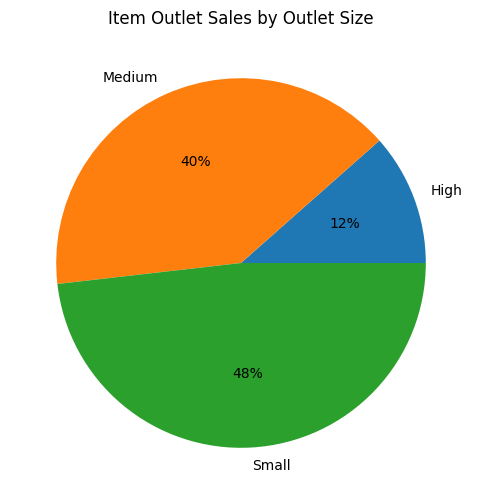

In [220]:
plt.figure(figsize = (6, 6))
plt.pie(Sales_Outlet_Size['Item_Outlet_Sales'], labels = Sales_Outlet_Size['Outlet_Size'], autopct = "%1.0f%%")
plt.title("Item Outlet Sales by Outlet Size")
plt.show()

In [223]:
Sales_Outlet_Type = df.groupby("Outlet_Type").agg({"Item_Outlet_Sales": "sum"}).reset_index()
Sales_Outlet_Type

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,3.680343e+05
1,Supermarket Type1,1.291734e+07
2,Supermarket Type2,1.851823e+06
3,Supermarket Type3,3.453926e+06


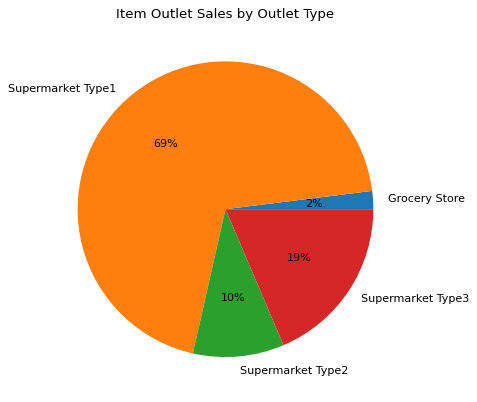

In [224]:
plt.figure(figsize = (6, 6), dpi = 80)
plt.pie(Sales_Outlet_Type['Item_Outlet_Sales'], labels = Sales_Outlet_Type['Outlet_Type'], autopct = "%1.0f%%")
plt.title("Item Outlet Sales by Outlet Type")
plt.show()